In [1]:
import pandas as pd

file_path = "/Users/larsheijnen/Thesis/data/MDS-UPDRS_Part_III_21Mar2025.csv"
data = pd.read_csv(file_path)

In [2]:
# Get unique participant IDs and their count
unique_participants = data['PATNO'].unique()
participant_count = len(unique_participants)

print(f"Total number of unique participants: {participant_count}")

# Get distribution of visits per participant
visits_per_participant = data['PATNO'].value_counts()
median_visits = visits_per_participant.median()

print("\nSummary of visits per participant:")
print(visits_per_participant.describe())
print(f"\nMedian number of visits per participant: {median_visits}")

Total number of unique participants: 4313

Summary of visits per participant:
count    4313.000000
mean        7.499652
std         7.935534
min         1.000000
25%         2.000000
50%         4.000000
75%        11.000000
max        40.000000
Name: count, dtype: float64

Median number of visits per participant: 4.0


Summary statistics for MDS-UPDRS Part III Total Score (NP3TOT):
count    26109.000000
mean        16.869126
std         14.683221
min          0.000000
25%          4.000000
50%         15.000000
75%         26.000000
max        100.000000
Name: NP3TOT, dtype: float64

Missing values in NP3TOT: 6237


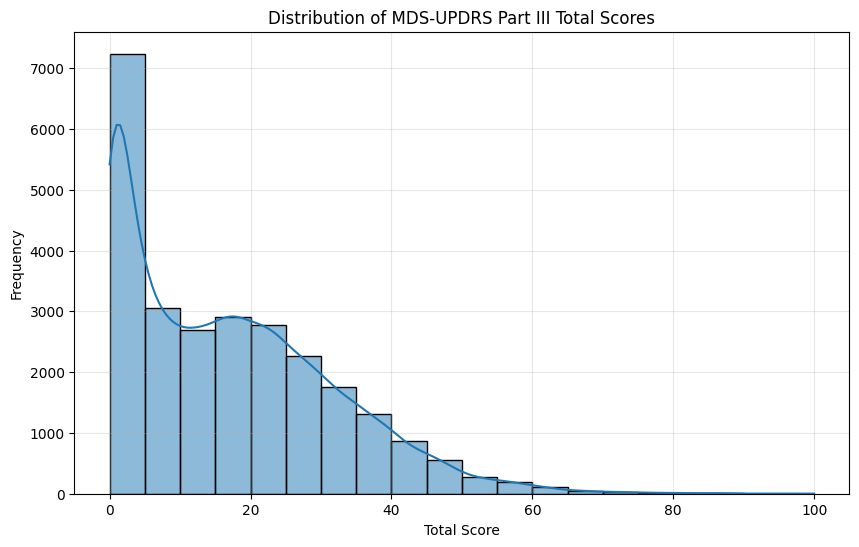

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Basic statistics on the total UPDRS scores
print("Summary statistics for MDS-UPDRS Part III Total Score (NP3TOT):")
print(data['NP3TOT'].describe())

# Check for missing values
missing_values = data['NP3TOT'].isna().sum()
print(f"\nMissing values in NP3TOT: {missing_values}")

# Distribution plot of UPDRS scores
plt.figure(figsize=(10, 6))
sns.histplot(data['NP3TOT'].dropna(), kde=True, bins=20) #this is the total MDS-UPDRS
plt.title('Distribution of MDS-UPDRS Part III Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Boxplot for UPDRS scores
# plt.figure(figsize=(10, 6))
# sns.boxplot(y=data['NP3TOT'].dropna())
# plt.title('Boxplot of MDS-UPDRS Part III Total Scores')
# plt.ylabel('Total Score')
# plt.grid(True, alpha=0.3)
# plt.show()

In [5]:
# Load the data dictionary
data_dict = pd.read_csv('/Users/larsheijnen/Thesis/data/Datadic_v0531_2024_11_25.csv')

# Find relevant fields for UPDRS
updrs_fields = data_dict[data_dict['DSCR'].str.contains('UPDRS', na=False)]

# Display column statistics
data.describe()

# Check for missing values
missing_values = data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
PDTRTMNT       2307
PDSTATE       17921
HRPOSTMED     19916
HRDBSON       31913
HRDBSOFF      32205
PDMEDYN        3333
DBSYN          1030
ONOFFORDER    28302
OFFEXAM       28889
OFFNORSN      30870
DBSOFFTM      32192
ONEXAM        28855
ONNORSN       32107
HIFUYN        29910
DBSONTM       31899
PDMEDDT       19792
PDMEDTM       19803
EXAMDT         1728
EXAMTM         5354
NP3SPCH        1722
NP3FACXP       1722
NP3RIGN        1725
NP3RIGRU       1725
NP3RIGLU       1725
NP3RIGRL       1727
NP3RIGLL       1729
NP3FTAPR       1724
NP3FTAPL       1727
NP3HMOVR       1724
NP3HMOVL       1728
NP3PRSPR       1724
NP3PRSPL       1726
NP3TTAPR       1753
NP3TTAPL       1750
NP3LGAGR       1723
NP3LGAGL       1724
NP3RISNG       1725
NP3GAIT        1724
NP3FRZGT       1738
NP3PSTBL       1752
NP3POSTR       1725
NP3BRADY       1725
NP3PTRMR       1725
NP3PTRML       1726
NP3KTRMR       1726
NP3KTRML       1725
NP3RTARU       1725
NP3RTALU       1725
NP3RTARL   

In [13]:
df_copy.to_csv('df_copy.csv', index=False)

date_columns = ['INFODT', 'PDMEDDT', 'EXAMDT', 'ORIG_ENTRY', 'LAST_UPDATE']
for col in date_columns:
    if col in df_copy.columns:
        df_copy[col] = pd.to_datetime(df_copy[col], errors='coerce')


In [14]:
X = df_copy.drop(['NP3TOT', 'REC_ID'], axis=1)
y = df_copy['NP3TOT']

In [15]:
categorical_cols = ['EVENT_ID', 'PAG_NAME', 'PDSTATE', 'ONOFFORDER']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [16]:
patient_ids = X['PATNO']
X = X.drop(['PATNO'], axis=1)

In [17]:
time_columns = ['EXAMTM', 'PDMEDTM']
for col in time_columns:
    if col in X.columns:
        # Convert time strings to minutes since midnight
        X[col] = X[col].apply(lambda x: pd.to_datetime(str(x), format='%H:%M:%S', errors='coerce'))
        X[col] = X[col].apply(lambda x: x.hour * 60 + x.minute if pd.notnull(x) else np.nan)

In [18]:
missing_threshold = 0.5  # 50% missing
cols_to_drop = [col for col in X.columns if X[col].isna().mean() > missing_threshold]
X = X.drop(cols_to_drop, axis=1)

In [19]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

In [20]:
for col in X.columns:
    if col not in numeric_cols:
        X[col] = X[col].fillna(X[col].mode()[0] if not X[col].mode().empty else "Unknown")

Top correlations with NP3TOT:
NP3TOT      1.000000
NP3BRADY    0.815013
NP3FACXP    0.748446
NP3FTAPL    0.728602
NP3HMOVL    0.727308
NP3HMOVR    0.706090
NP3PRSPL    0.704715
NP3FTAPR    0.703427
NP3RIGLU    0.691888
NP3TTAPL    0.689131
Name: NP3TOT, dtype: float64


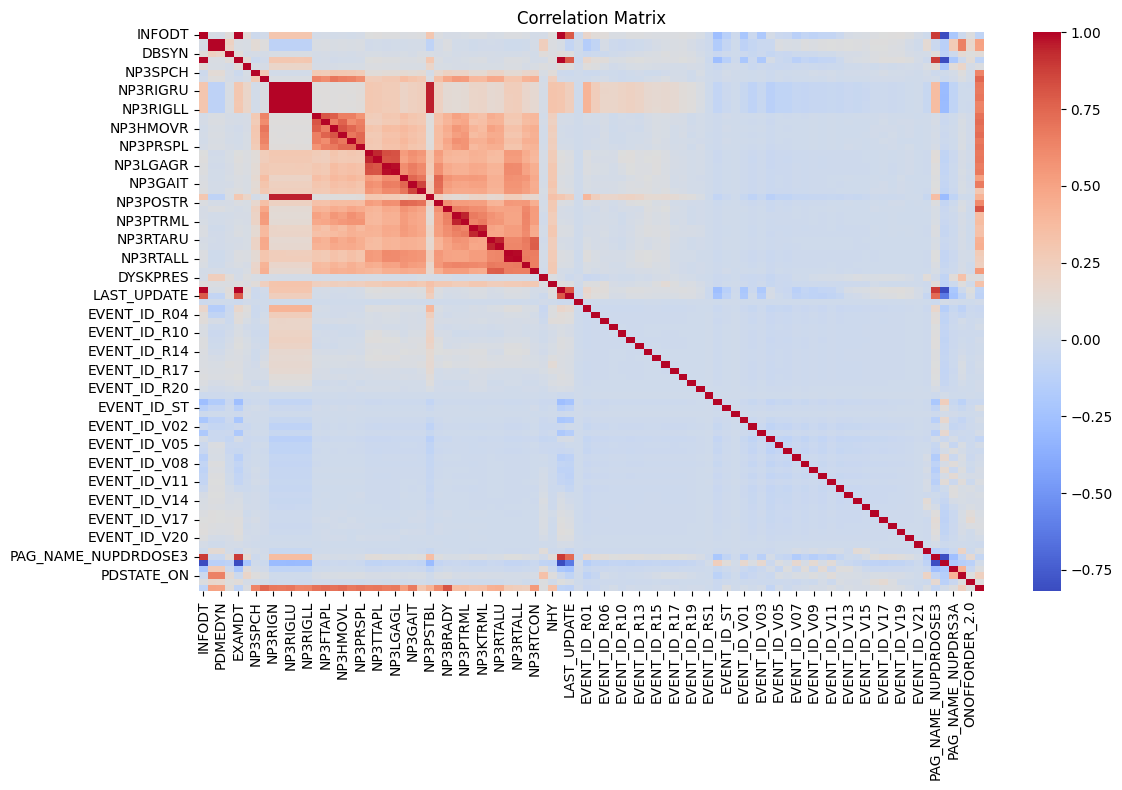

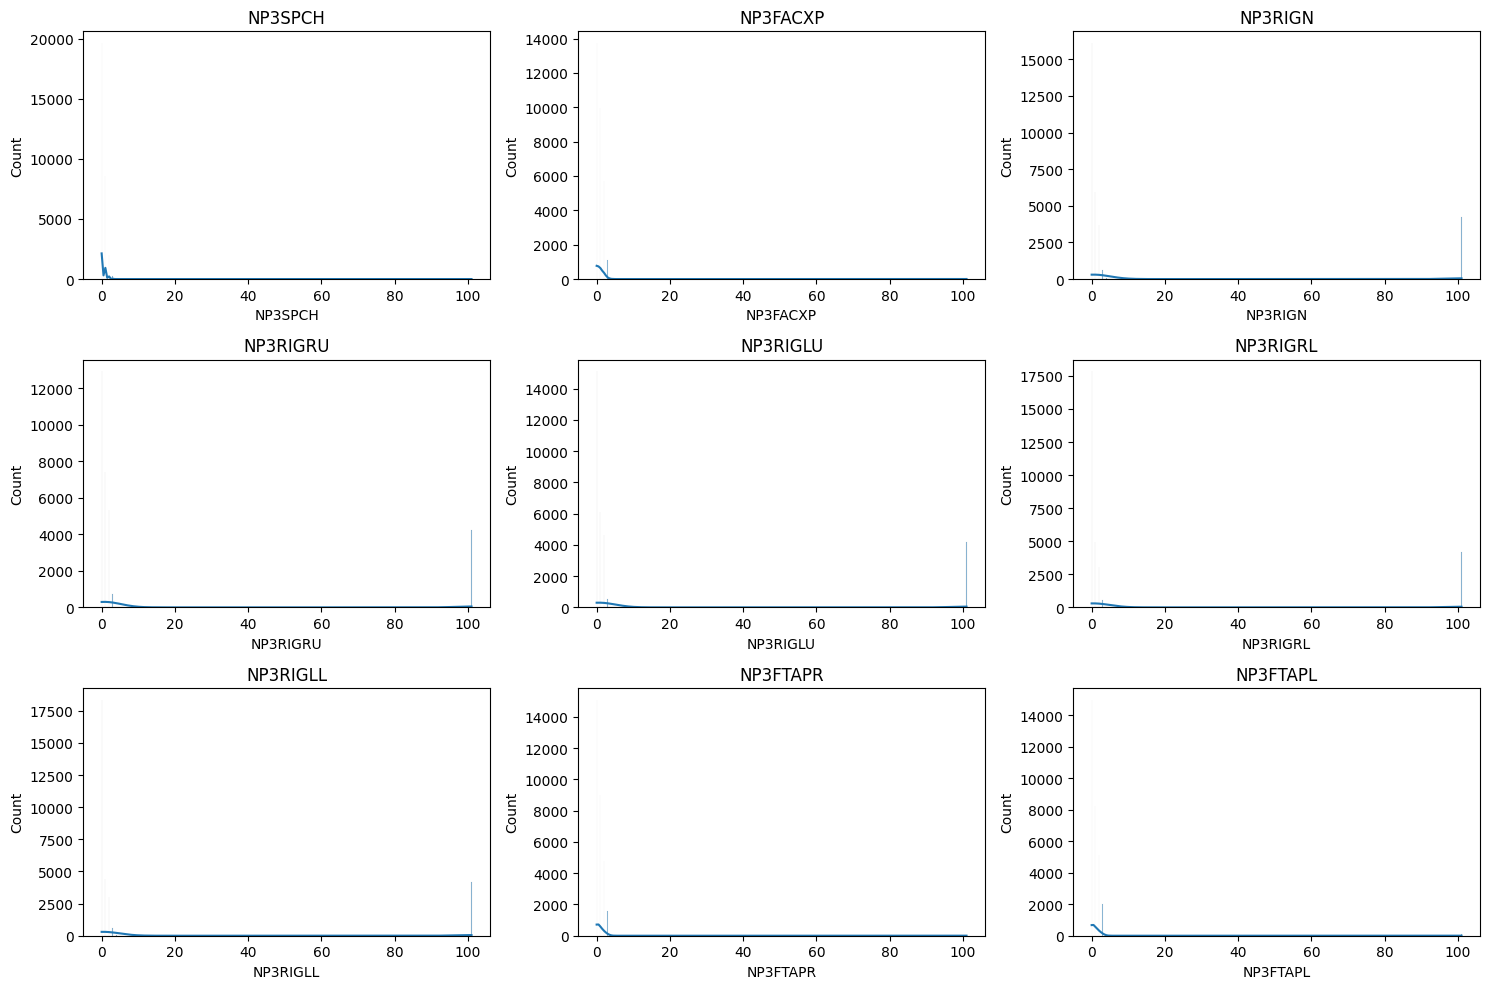

In [ ]:
# Create a dataframe with both features and target for correlation analysis
analysis_df = X.copy()
analysis_df['NP3TOT'] = y

# Calculate correlations with target
correlations = analysis_df.corr()['NP3TOT'].sort_values(ascending=False)
print("Top correlations with NP3TOT:")
print(correlations.head(10))

# Visualize key relationships
plt.figure(figsize=(12, 8))
sns.heatmap(analysis_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.tight_layout()

# Plot distributions of key motor features
motor_features = [col for col in data.columns 
                 if col.startswith('NP3') and col != 'NP3TOT']

if len(motor_features) > 0:
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(motor_features[:9]):  # Plot first 9 features
        plt.subplot(3, 3, i+1)
        sns.histplot(data[feature].dropna(), kde=True)
        plt.title(feature)
    plt.tight_layout()